# Linear Algebra

## Session 13: Singular Value Decomposition

### Gerhard Jäger


February 1, 2024



In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams["figure.figsize"] = (6,6)


## Deriving the SVD

- Let $A$ be a non-zero $n\times m$ matrix, with $n\leq m$. 


- $AA^T$ is symmetric and positive semidefinite. Therefore there are $n\times n$ matries $U, \Lambda$ with

$$
\begin{aligned}
U^{-1} &= U^T\\
\Lambda &\mbox{ is a non-negative diagonal matrix, with entries in descending order}\\
AA^T &= U\Lambda U^T
\end{aligned}
$$

Let $\mathbf u_i$ be the $i$th column of $U$, $\lambda_i (=\Lambda_{i,i})\neq 0$, and let $\mathbf x_i = A^T\mathbf u_i$

$$
\begin{aligned}
\|\mathbf x_i\|^2 &= \|A^T \mathbf u_i\|^2\\
&= \mathbf u_i^T AA^T \mathbf u_i\\
&= \mathbf u_i^T \lambda_i \mathbf u_i\\
&= \lambda_i \mathbf u_i^T \mathbf u_i\\
&= \lambda_i \|\mathbf u_i^T\|^2\\
\|\mathbf x_i\| &= \sqrt{\lambda_i}\|\mathbf u_i^T\|\\
\sigma_i &\doteq \sqrt{\lambda_i}\\
\mathbf v_i &\doteq \frac{1}{\sigma_i} A^T\mathbf u_i
\end{aligned}
$$


Therefore all $\mathbf v_i$ are unit-vectors, i.e., $\|\mathbf v_i\|=1$.

Now let $i\neq j$ and $\lambda_i, \lambda_j\neq 0$.

$$
\begin{aligned}
\mathbf v_i^T \mathbf v_j &= (\frac{1}{\sigma_i}A^T\mathbf u_i)^T(\frac{1}{\sigma_j}A^T\mathbf u_j)\\
&= \frac{1}{\sigma_i\sigma_j}\mathbf u_i^T AA^T \mathbf u_j\\
&= \frac{1}{\sigma_i\sigma_j}\mathbf u_i^T \lambda_j \mathbf u_j\\
&= \frac{\sigma_j}{\sigma_i}\mathbf u_i^T \mathbf u_j\\
&= \mathbf 0
\end{aligned}
$$

So if $i\neq j$ and $\lambda_i, \lambda_j\neq 0$, $\mathbf u_i$ and $\mathbf u_j$ are perpendicular to each other.


Finally:
    
Let $\sigma_i\neq 0$. 
$$
\begin{aligned}
A^TA\mathbf v_i &= A^T A (\frac{1}{\sigma_i}A^T\mathbf u_i)\\
&= \frac{1}{\sigma_i}A^T A A^T\mathbf u_i\\
&= \frac{1}{\sigma_i}A^T (\lambda_i\mathbf u_i)\\
&= \sigma_i A^T \mathbf u_i\\
&= \lambda_i \mathbf v_i
\end{aligned}
$$

$AA^T$ and $A^TA$ have the same non-zero eigenvectors, and all $u_i$ are eigenvectors of $A^TA$.

### wrapping everything up

We have

$$A^T \mathbf u_i = \sigma_i \mathbf v_i$$

for all $i$ with $\sigma_i\neq 0$. $\mathbf u_i$ is an eigenvector of $AA^T$ and $\mathbf v_i$ an eigenvector of $A^TA$. 

If $\sigma_i=0$, then $\lambda_i=0$, i.e.

$$
AA^T \mathbf u_i = \mathbf 0
$$

We have

$$
\begin{aligned}
\|A^T\mathbf u_i\|^2 &= \mathbf u_i^TAA^T\mathbf u_i\\
&= 0\\
A^T\mathbf u_i &= \mathbf 0
\end{aligned}
$$

Therefore, even if $\sigma_i=0$:

$$A^T \mathbf u_i = \sigma_i \mathbf v_i$$

We can combine this for all $i$ to get

$$
A^T U = 
\begin{bmatrix}
\mathbf v_i \cdots \mathbf v_n
\end{bmatrix}\Sigma_{1\cdots n} 
$$

Where $\Sigma_{1\cdots n}$ is an $n\times n$ diagonal matrix with $\sigma_i$ in the $i$th diagonal cell.

If $m>n$ we can add all eigenvectors of $A^TA$ to $\begin{bmatrix}
\mathbf v_i \cdots \mathbf v_n
\end{bmatrix}$
which correspond to the eigenvector $0$. This completes the eigenvector matrix of $A^TA$.

Likewise, we extend $\Sigma_{1\cdots n}$ to an $m\times n$ matrix $\Sigma^T$ by adding all-zero rows at the end.

This yields:

$$
\begin{aligned}
A^TU &= V\Sigma^T \\
A^T &= V\Sigma^T U^T\\
A &= U\Sigma V^T
\end{aligned}
$$


The last line is the **Singular Value Decomposition** of the matrix $A$.

### matrices as operations on vectors



In [2]:
import numpy as np


In [3]:
theta = np.arange(0,2*np.pi, 0.01)
x = np.cos(theta)
y = np.sin(theta)

coords = np.c_[x,y].T
arrowHeads = np.eye(2)

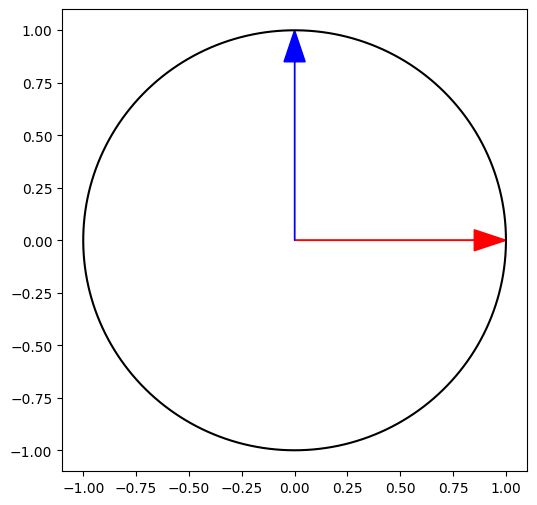

In [4]:
fig = plt.figure(figsize=(6,6))
plt.plot(coords[0,:], coords[1,:], color='black')
plt.arrow(0,0,arrowHeads[0,0],arrowHeads[0,1], color='red', head_width=.1, length_includes_head=True)
plt.arrow(0,0,arrowHeads[1,0],arrowHeads[1,1], color='blue', head_width=.1, length_includes_head=True)
plt.show()

In [5]:
A = np.array([
    [1,1],
    [2,1]
])
A

array([[1, 1],
       [2, 1]])

In [6]:
aCoords = A @ coords
aHeads = A @ arrowHeads

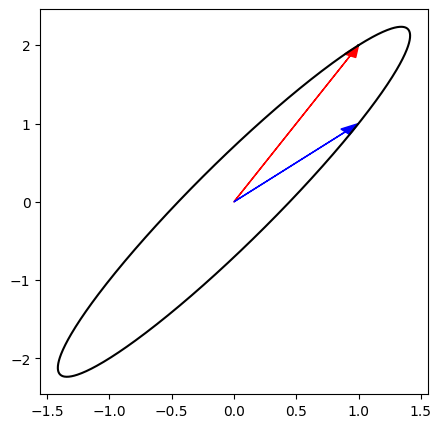

In [7]:
fig = plt.figure(figsize=(5,5))
plt.plot(aCoords[0,:], aCoords[1,:], color='black')
plt.arrow(0,0,aHeads[0,0], aHeads[1,0], color='red', head_width=.1, length_includes_head=True)
plt.arrow(0,0,aHeads[0,1], aHeads[1,1], color='blue', head_width=.1, length_includes_head=True)
plt.show()

## Singular Value Decomposition

<img src=_img/svd.svg width="500">

(image modified from Wikipedia, https://en.wikipedia.org/wiki/Singular_value_decomposition)

- $\Sigma$ is a **diagonal matrix**. Its entries are called **singular values**.
- $U$ and $V$ are **orthonormal matrices**: 

$$
\begin{aligned}
U^{-1} &= U^T\\
V^{-1} &= V^T\\
\end{aligned}
$$
- consequences:
    - all rows and all columns of $U$ and $V$ have length 1
    - different rows and different columns of $U$ are mutually orthogonal
    - same for $V$
    - $U$ and $V$ are rigidly rotated/mirrored coordinate systems!


### Examples



In [8]:
import sympy
from sympy import Matrix, sqrt, Rational


In [9]:
A = Matrix([
    [3,2,2],
    [2,3,-2]
])
A

Matrix([
[3, 2,  2],
[2, 3, -2]])

$$
A = 
\left[\begin{matrix}\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}\\\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\end{matrix}\right]
\left[\begin{matrix}
5 & 0 & 0\\
0 & 3 & 0
\end{matrix}\right]
\left[\begin{matrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0\\
- \frac{\sqrt{2}}{6} & \frac{\sqrt{2}}{6} & - \frac{2 \sqrt{2}}{3}\\
- \frac{2}{3} & \frac{2}{3} & \frac{1}{3}\end{matrix}\right]
$$

In [10]:
from sympy import sqrt, Rational

In [11]:
u = Matrix([
    [1,-1],
    [1,1]
]) / sqrt(2)
u

Matrix([
[sqrt(2)/2, -sqrt(2)/2],
[sqrt(2)/2,  sqrt(2)/2]])

In [12]:
u * u.T

Matrix([
[1, 0],
[0, 1]])

In [13]:
sigma = Matrix([
    [5, 0, 0],
    [0, 3, 0]
])
sigma

Matrix([
[5, 0, 0],
[0, 3, 0]])

In [14]:
v = Matrix([
    [ sqrt(2)/2,-sqrt(2)/6, -Rational(2,3)],
    [sqrt(2)/2, sqrt(2)/6, Rational(2,3)],
    [0, -2*sqrt(2)/3, Rational(1,3)]
])
v.T

Matrix([
[ sqrt(2)/2, sqrt(2)/2,            0],
[-sqrt(2)/6, sqrt(2)/6, -2*sqrt(2)/3],
[      -2/3,       2/3,          1/3]])

In [15]:
v * v.T

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [16]:
u * sigma * v.T

Matrix([
[3, 2,  2],
[2, 3, -2]])

In [17]:
u1, sigma1, v1 = A.singular_value_decomposition()

In [18]:
u1

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

In [19]:
sigma1

Matrix([
[3, 0],
[0, 5]])

In [20]:
v1.T

Matrix([
[-sqrt(2)/6, sqrt(2)/6, -2*sqrt(2)/3],
[ sqrt(2)/2, sqrt(2)/2,            0]])

### goal of dimensionality reduction


decompose an arbitray $m\times n$ matrix $A$ of rank $r$ into the sum of $r$ rank-1 matrices, such that

- $A = A^{(1)} + \cdots + A^{(r)}$,
- $A^{(1)}$ is as close as possible to $A$,
- $A^{(2)}$ is as close as possible to $A-A^{(1)}$,
- $\cdots$
- $A^{(i)}$ is as close as possible to $A-A^{(1)}-\cdots-A^{(i-1)}$.


**What to we mean by *as close as possible*?**


Let's consider $A$, $A^{(1)}$ etc. as a sequence of $n$ length-$n$ vectors

$$
\begin{aligned}
A &= \begin{bmatrix}
\mathbf a_1 \cdots \mathbf a_n
\end{bmatrix}\\
A^{(i)} &= \begin{bmatrix}
\mathbf a^{(i)}_1 \cdots \mathbf a^{(i)}_n
\end{bmatrix}\\
\end{aligned}
$$

The discrepancy between $A$ and $A^{(1)}$ is the **sum of squared errors**  

$$d(A, A^{(1)}) \doteq \sum_i\|\mathbf a_i - \mathbf a^{(1)}_i\|^2$$

$A^{(1)}$ means:

$$
A^{(1)} = \mathbf x \mathbf y^T
$$

Thanks to SVD, we know that

$$
\begin{aligned}
A &= U\Sigma V^T\\
A-A^{(1)} &= U\Sigma V^T-A^{(1)}\\
U^T(A-A^{(1)})V &= U^T(U\Sigma V^T-A^{(1)})V\\
&= \Sigma  - U^TA^{(1)} V\\
A^{(1)} &= \mathbf x\mathbf y^T\\
U^T(A-A^{(1)})V &= \Sigma - (U^T\mathbf x)(\mathbf y^T V)
\end{aligned}
$$

So let us say that 
$$
\begin{aligned}
\mathbf z &= U^T\mathbf x\\
\mathbf w &= V^T \mathbf y
\end{aligned}
$$

We search $\mathbf z$ and $\mathbf w$ which minimize the sum of squared error to $\Sigma$. From that we can recover $\mathbf x, \mathbf y$.

Without loss of generality, we can assume that $\|\mathbf z\|=1$.

$$
\begin{aligned}
\|\Sigma - \mathbf z\mathbf w^T\|^2 &= \sum_{i,j} (\sigma_{i,j} - z_iw_j)^2\\
&= \sum_i (\sigma_i - z_iw_i)^2 + \sum_i\sum_{j\neq i} z_i^2w_j^2\\
&= \sum_i (\sigma_i^2 - 2\sigma_iz_iw_i + z_i^2w_i^2) + \sum_i\sum_{j\neq i} z_i^2w_j^2\\
&= \sum_i \sigma_i^2 - 2\sum_i \sigma_iz_iw_i + \sum_i z_i^2w_i^2) + \sum_i\sum_{j\neq i} z_i^2w_j^2\\
&= \sum_i \sigma_i^2 - 2\sum_i \sigma_iz_iw_i - z_i^2 w_i^2  + \sum_i\sum_j z_i^2w_j^2\\
&= \sum_i \sigma_i^2 - 2\sum_i \sigma_iz_iw_i - z_i^2 w_i^2  + \sum_jw_j^2\sum_i z_i^2\\
&= \sum_i \sigma_i^2 - 2\sum_i \sigma_iz_iw_i +  \sum_jw_j^2\\
\end{aligned}
$$

Next we find out for which values of $w_i$ is the sum of squared error minimized.

$$
\begin{aligned}
\frac{\partial}{\partial w_i}\|\Sigma - \mathbf z\mathbf w^T\|^2 &= \frac{\partial}{\partial w_i}\sum_i \sigma_i^2 - 2\sum_i \sigma_iz_iw_i +  \sum_jw_j^2\\
&= -2\sigma_iz_i + 2w_i
\end{aligned}
$$


This is $0$ if and only if $\sigma_i=0$ or
$$
w_i = \sigma_i z_i
$$

The second derivative is 2, so these are local minima.

Next we insert these partial solutions.


$$
\begin{aligned}
\|\Sigma - \mathbf z\mathbf w^T\|^2 
&= \sum_i \sigma_i^2 - 2\sum_i \sigma_iz_iw_i +  \sum_jw_j^2\\
&= \sum_i \sigma_i^2 - 2\sum_i \sigma_i^2z_i^2 +  \sum_i\sigma_i^2z_i^2\\
&= \sum_i \sigma_i^2 - \sum_i\sigma_i^2z_i^2\\
\end{aligned}
$$

We achieve the minimal value if $\sum_i\sigma_i^2z_i^2$ is maximized. Recall that $\|\mathbf z\|=1$, i.e., $\sum_i z_i^2 = 1$. Obviously the maximum is reached if $z_i=1$ for $i=\arg_i\max \sigma_i$, and $z_j=0$ for $j\neq i$.



By convention, the **singular values** $\sigma_i$ are sorted in descending order. So the maximum is reached if 

$$
\mathbf z = \begin{bmatrix}
1\\
0\\
\vdots\\
0
\end{bmatrix}
$$

For $\mathbf w$ this entails:

$$
\mathbf w = \begin{bmatrix}
\sigma_1\\
0\\
\vdots\\
0
\end{bmatrix}
$$


Finally, we recall that
$$
\begin{aligned}
\mathbf{x} &= U\mathbf z\\
\mathbf y &= V\mathbf w
\end{aligned}
$$

These are just $\mathbf u_1$ (the first column of $U$) and $\sigma \mathbf v_1$ (the first column of $V$, multiplied by $\sigma_i$).

The rank-1 matrix closest to $A$ is constructed by keeping $\sigma_1$ and setting all other cells in $\Sigma$ to 0.

Likewise, the rank-2 matrix closest to $A$ is constructed by keeping $\sigma_1$ and $\sigma_2$ and setting all other cells in $\Sigma$ to 0 etc.

Here is a nice demo: http://timbaumann.info/svd-image-compression-demo/

Back to our toy example:

In [21]:
A = np.array([
    [3,2,2],
    [2,3,-2]
])
A

array([[ 3,  2,  2],
       [ 2,  3, -2]])

In [22]:
u, sigma_flat, vt = np.linalg.svd(A)

In [23]:
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

NumPy only returns the vector of diagonal entries; we have to construct the $\Sigma$-matrix "by hand".

In [24]:
sigma_flat

array([5., 3.])

In [25]:
sigma = np.zeros(A.shape)
np.fill_diagonal(sigma, sigma_flat)
sigma

array([[5., 0., 0.],
       [0., 3., 0.]])

In [26]:
np.around(vt, 3)

array([[-0.707, -0.707, -0.   ],
       [-0.236,  0.236, -0.943],
       [-0.667,  0.667,  0.333]])

Checking whether this is in fact the SVD:

In [27]:
u @ sigma @ vt

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

To get the closest rank-1 approximation to $A$, we set all diagonal values in $\Sigma$ except the first on to 0.

In [28]:
sigma1 = np.copy(sigma)
sigma1[1,1] = 0
sigma1

array([[5., 0., 0.],
       [0., 0., 0.]])

In [29]:
A1 = u @ sigma1 @ vt
np.around(A1, 3)

array([[2.5, 2.5, 0. ],
       [2.5, 2.5, 0. ]])

In [30]:
np.around(np.reshape(u[:,0], (-1,1)) @ np.reshape(vt[0,:], (1,-1)) * 5, 3)

array([[2.5, 2.5, 0. ],
       [2.5, 2.5, 0. ]])

### Back to a real-life example



In [31]:
im = plt.imread("_img/cup.png")[:,:,0]
im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
im.shape

(512, 512)

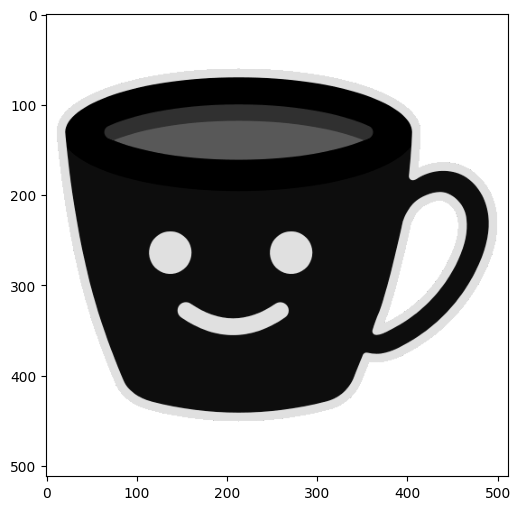

In [33]:
fig = plt.figure(figsize=(6,6))
plt.imshow(im, cmap="Greys")
plt.show()

In [34]:
np.linalg.matrix_rank(im)

355

In [35]:
u_im, s_flat_im, ut_im = np.linalg.svd(im)

In [36]:
u_im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [37]:
s_flat_im

array([2.89000183e+02, 6.73423080e+01, 4.62294121e+01, 4.07451515e+01,
       3.20621185e+01, 2.66224594e+01, 2.10022335e+01, 1.87831879e+01,
       1.68701534e+01, 1.24505434e+01, 1.13137856e+01, 1.07290087e+01,
       9.79641151e+00, 8.01175976e+00, 7.24687386e+00, 6.48882294e+00,
       6.34246254e+00, 5.96218061e+00, 5.71526432e+00, 5.47274113e+00,
       5.22081470e+00, 5.03713751e+00, 4.96409988e+00, 4.58789778e+00,
       4.50719070e+00, 4.38858557e+00, 4.19321394e+00, 4.06188679e+00,
       3.98327088e+00, 3.88833189e+00, 3.74917960e+00, 3.67281127e+00,
       3.57578611e+00, 3.49746442e+00, 3.35420370e+00, 3.32701755e+00,
       3.24121451e+00, 3.14274049e+00, 3.13950515e+00, 3.07107663e+00,
       2.95565987e+00, 2.84772491e+00, 2.78590202e+00, 2.70791984e+00,
       2.57790709e+00, 2.53286958e+00, 2.47771549e+00, 2.42985535e+00,
       2.36578059e+00, 2.25566125e+00, 2.24351406e+00, 2.17652535e+00,
       2.10580325e+00, 2.06211758e+00, 2.02934098e+00, 2.01485109e+00,
      

In [38]:
ut_im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

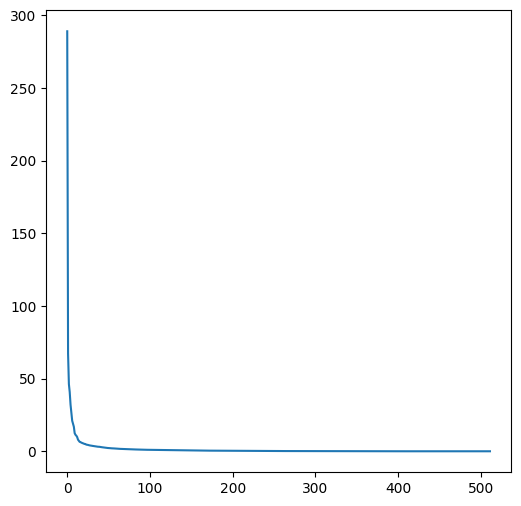

In [39]:
fig = plt.figure(figsize=(6,6))
plt.plot(s_flat_im)
plt.show()

The *singular values* in `s_flat_im` tell us how much information the indivual columns of `u_im`/ rows of `vt_im` contribute to the overall information.

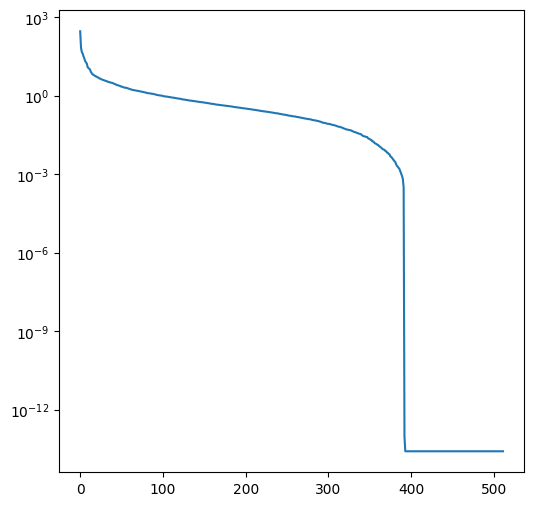

In [40]:
fig = plt.figure(figsize=(6,6))
plt.semilogy(s_flat_im)
plt.show()

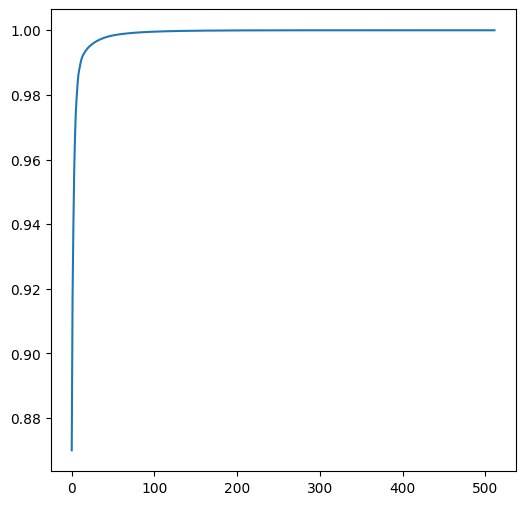

In [41]:
fig = plt.figure(figsize=(6,6))
plt.plot(np.cumsum(s_flat_im**2) / sum(s_flat_im**2))
plt.show()

Let's check that SVD really worked:

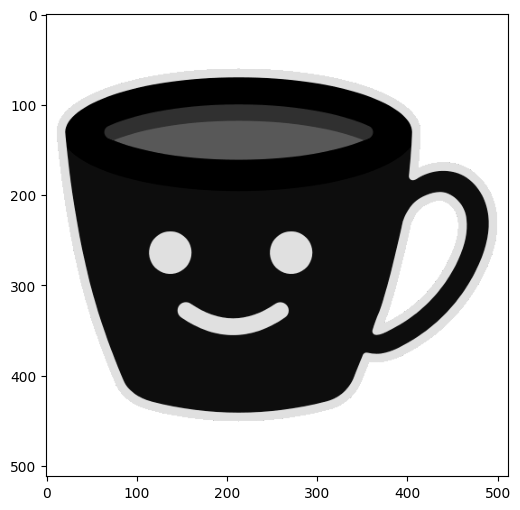

In [42]:
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im @ ut_im, cmap="Greys")
plt.show()

Note that, when working with `numpy`, we don't have to bother constructing a real diagonal matrix. We can use the vector `s_flat_im` and broadcast it over the matrix `u_im` with `*`.

In [43]:
s_flat_im1 = np.zeros(s_flat_im.shape)
s_flat_im1[0] = s_flat_im[0]
s_flat_im1

array([289.00018311,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

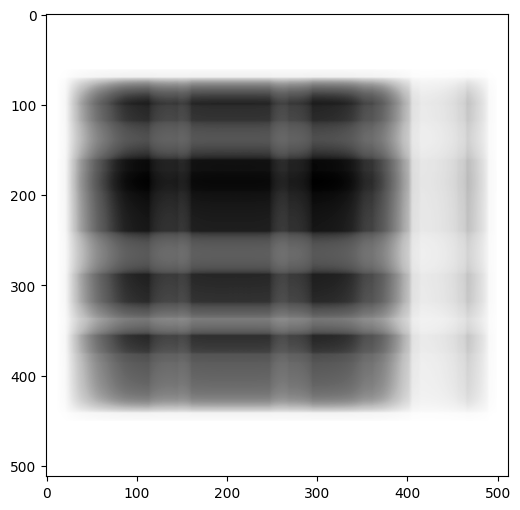

In [44]:
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im1 @ ut_im, cmap="Greys")
plt.show()

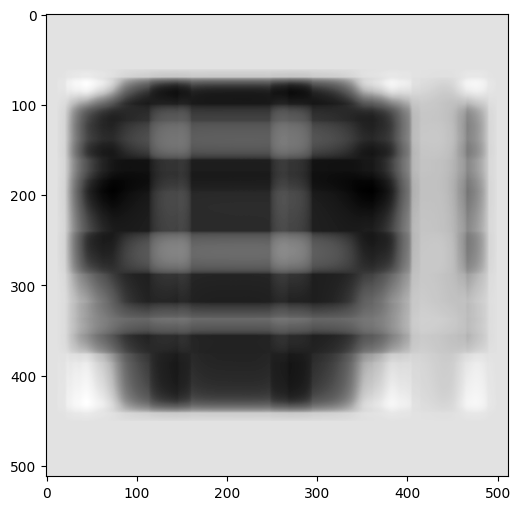

In [45]:
ndim = 2
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

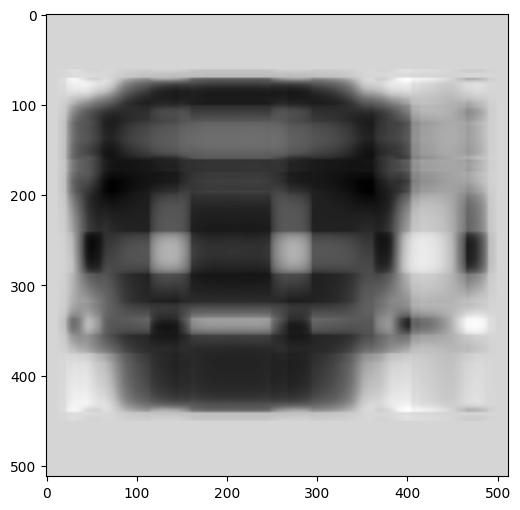

In [46]:
ndim = 3
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

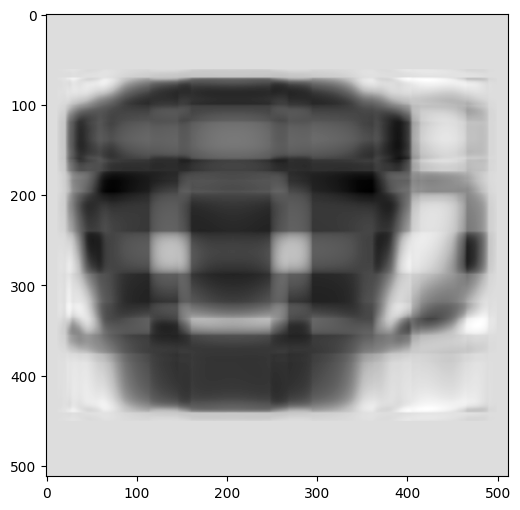

In [47]:
ndim = 4
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

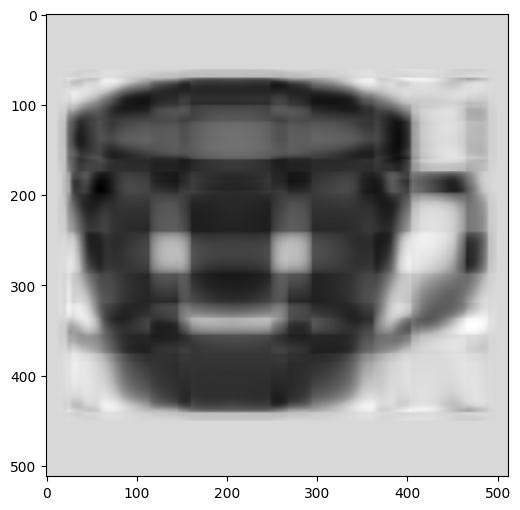

In [48]:
ndim = 5
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

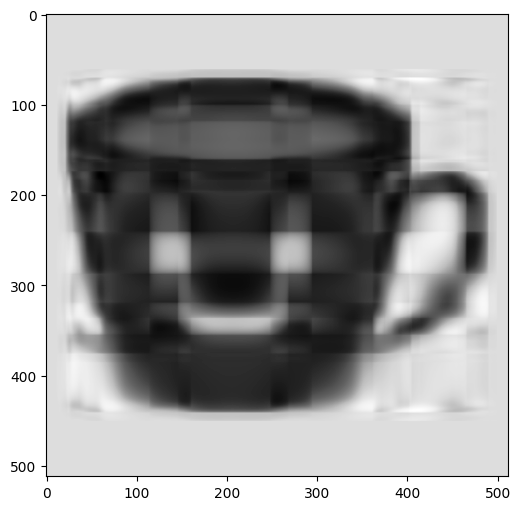

In [49]:
ndim = 6
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

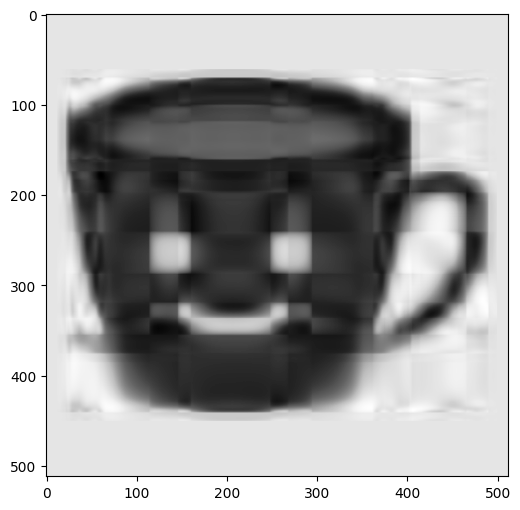

In [50]:
ndim = 7
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

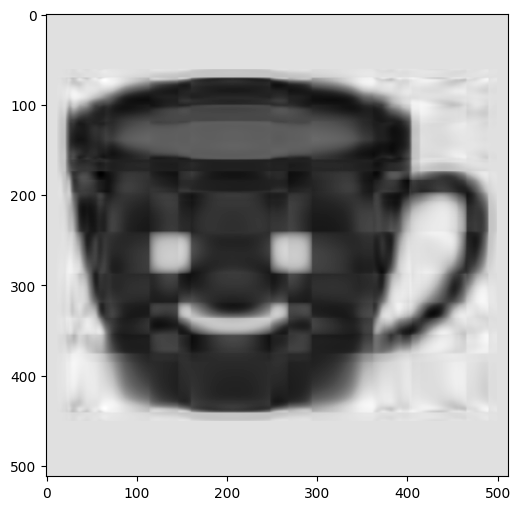

In [51]:
ndim = 8
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

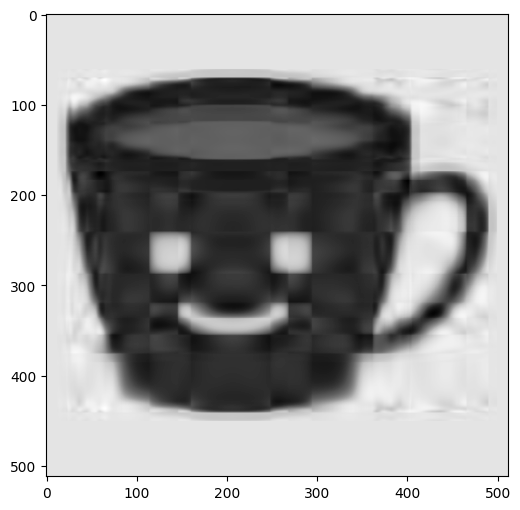

In [52]:
ndim = 9
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

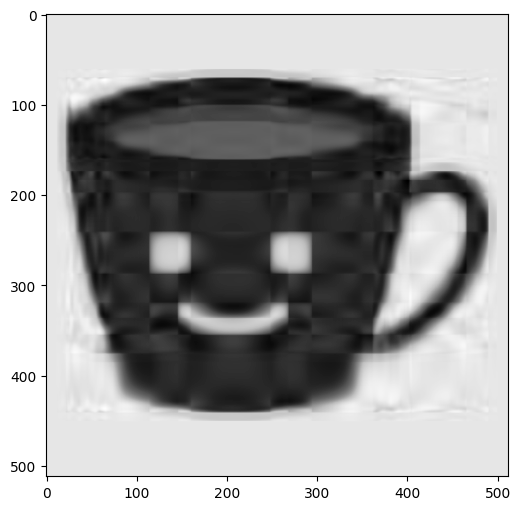

In [53]:
ndim = 10
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

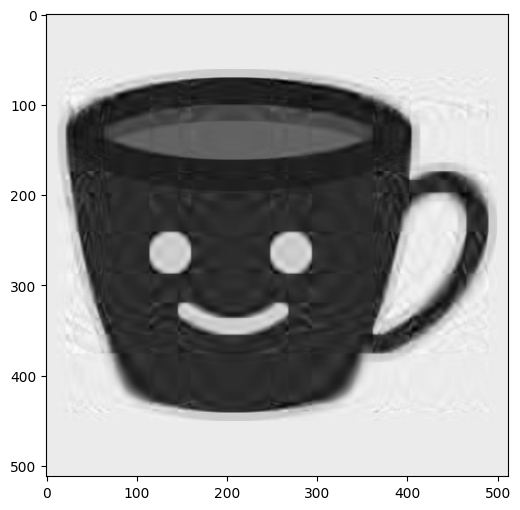

In [54]:
ndim = 20
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

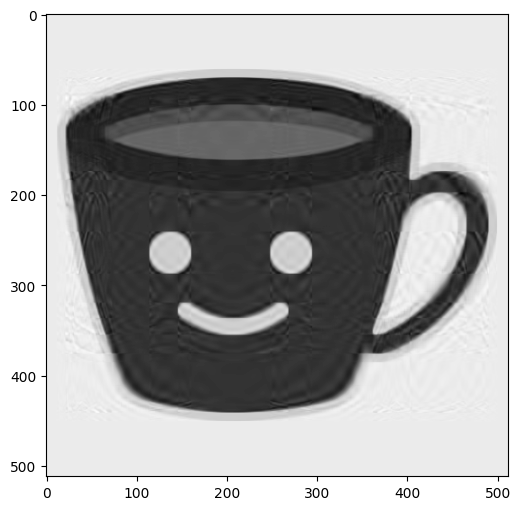

In [55]:
ndim = 30
s_flat_im_reduced = np.zeros(s_flat_im.shape)
s_flat_im_reduced[:ndim] = s_flat_im[:ndim]
fig = plt.figure(figsize=(6,6))
plt.imshow(u_im * s_flat_im_reduced @ ut_im, cmap="Greys")
plt.show()

## SVD with corpus counts

In [56]:
import string
import nltk
import pandas as pd
import numpy as np
import scipy

In [57]:
nltk.download('brown')


[nltk_data] Downloading package brown to /home/gjaeger/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [58]:
brown_wordcounts = nltk.FreqDist(nltk.corpus.brown.words())


In [59]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = np.unique(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gjaeger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
def normalize_wordlist(wl):
    wl = [w.lower().strip(string.punctuation) for w in wl]
    return [w for w in wl if w != "" and not w in stop_words]


In [61]:
brown_words = normalize_wordlist(nltk.corpus.brown.words())


In [62]:
brown_wordcounts = nltk.FreqDist(brown_words)


In [63]:
brown_sents = [normalize_wordlist(s) for s in nltk.corpus.brown.sents()]
brown_sents = [s for s in brown_sents if len(s) > 0]

In [64]:
def each_contextword_1wordwindow(wordlist, targetindex):
    if targetindex > 0:
        # preceding word
        yield wordlist[targetindex - 1]
        
    if targetindex < len(wordlist)- 1:
        # succeeding word
        yield wordlist[targetindex + 1]
        

In [65]:
brown_context_counts = nltk.ConditionalFreqDist()

frequency_threshold = 20

for sentence in brown_sents:
    
    for targetindex, target in enumerate(sentence):
        for contextword in each_contextword_1wordwindow(sentence, targetindex):
            if brown_wordcounts[target] >= frequency_threshold and brown_wordcounts[contextword] >= frequency_threshold:
                brown_context_counts[target][contextword] += 1   


In [66]:
frequency_threshold = 20

brown_wordlist = list(w for w in brown_wordcounts if brown_wordcounts[w] >= frequency_threshold)

In [67]:

brown_wordlist_lookup = dict((word, index) for index, word in enumerate(brown_wordlist))

In [68]:
brown_count_matrix = np.zeros((len(brown_wordlist), len(brown_wordlist)))

In [69]:
for sentence in brown_sents:
    for targetindex, target in enumerate(sentence):
        for contextword in each_contextword_1wordwindow(sentence, targetindex):
            if brown_wordcounts[target] >= frequency_threshold and brown_wordcounts[contextword] >= frequency_threshold:
                # which cell in the matrix is this? 
                # look up both the target and the context word
                # in the ordered list of Brown words
                targetindex_matrix = brown_wordlist_lookup[target]
                contextindex_matrix = brown_wordlist_lookup[contextword]
                # and add a count of one for this cell in the matrix
                brown_count_matrix[targetindex_matrix][contextindex_matrix] += 1   


In [70]:
def cosine_sim(vec1, vec2):
    return 1 - scipy.spatial.distance.cosine(vec1, vec2)

In [71]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors_obj = NearestNeighbors(
    n_neighbors=20, metric = scipy.spatial.distance.cosine)

# we then allow it to compute an internal datastructure from our data
nearest_neighbors_obj.fit(brown_count_matrix)

NearestNeighbors(metric=<function cosine at 0x7ff4bfc7b280>, n_neighbors=20)

In [72]:
def get_nearest_neighbors(word, n_neighbors=40, mtx=brown_count_matrix):
    word_index = brown_wordlist_lookup[word]
    nearest_neighbors_obj = NearestNeighbors(n_neighbors=n_neighbors, metric = scipy.spatial.distance.cosine)
    nearest_neighbors_obj.fit(mtx)
    cosine_distances, target_indices = nearest_neighbors_obj.kneighbors([mtx[word_index]])
    wordNN = pd.DataFrame(
        np.c_[
            np.array([brown_wordlist[i] for i in [target_indices][0][0]]), 
            1-cosine_distances[0]
        ],
        columns = ['word', 'cosine similarity']
    )
    return wordNN

In [73]:
get_nearest_neighbors("germany")

,word,cosine similarity
0,germany,1.0
1,berlin,0.6057070728222133
2,greenwich,0.5299329050018617
3,coast,0.45646022981185497
4,germans,0.3973597071195132
5,german,0.3205804274726973
6,river,0.29152647996287484
7,middle,0.2819363471090537
8,west,0.26885390408291654
9,orange,0.25415212262620734


In [74]:
brown_count_matrix

array([[18., 32., 18., ...,  0.,  0.,  0.],
       [32.,  2., 42., ...,  0.,  0.,  0.],
       [18., 42.,  8., ...,  0.,  1.,  3.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]])

In [75]:
brown_count_matrix.shape

(4844, 4844)

In [76]:
np.linalg.matrix_rank(brown_count_matrix)

4844

In [77]:
uBrown, sigmaBrown_flat, vtBrown = np.linalg.svd(brown_count_matrix)

In [78]:
np.around(uBrown,2)

array([[-0.31,  0.01,  0.07, ...,  0.  ,  0.  , -0.  ],
       [-0.25, -0.  ,  0.05, ..., -0.  , -0.  , -0.  ],
       [-0.14, -0.  ,  0.03, ..., -0.  , -0.  , -0.  ],
       ...,
       [-0.  , -0.  ,  0.  , ..., -0.  ,  0.01,  0.  ],
       [-0.  ,  0.  ,  0.  , ...,  0.01, -0.  , -0.01],
       [-0.  ,  0.  ,  0.  , ..., -0.  ,  0.03, -0.  ]])

In [79]:
np.around(sigmaBrown_flat)

array([481., 403., 402., ...,   0.,   0.,   0.])

In [80]:
np.around(vtBrown, 2)

array([[-0.31, -0.25, -0.14, ..., -0.  , -0.  , -0.  ],
       [-0.01,  0.  ,  0.  , ...,  0.  , -0.  , -0.  ],
       [ 0.07,  0.05,  0.03, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , -0.  , -0.  , ..., -0.  ,  0.01, -0.  ],
       [ 0.  , -0.  , -0.  , ...,  0.01, -0.  ,  0.03],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.01,  0.  ]])

The *singular values* in `sigmaBrown_flat` tell us how much information the corresponding columns of `uBrown` / rows of `vtBrown` contribute to the information in `brown_count_matrix`.

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt


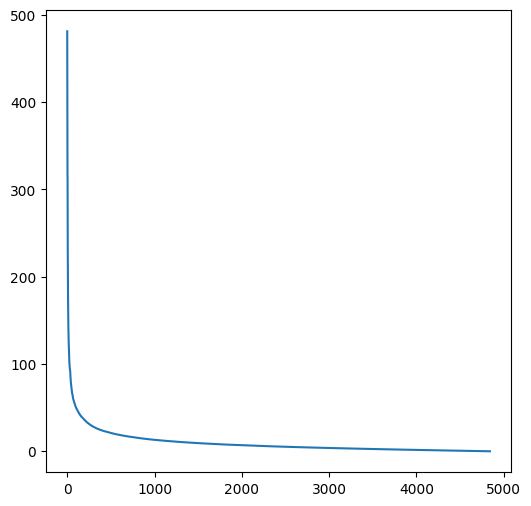

In [82]:
fig = plt.figure(figsize=(6,6))
plt.plot(sigmaBrown_flat)
plt.show()

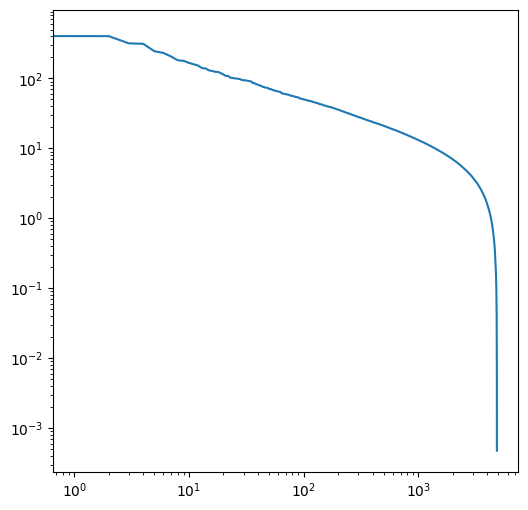

In [83]:
fig = plt.figure(figsize=(6,6))
plt.loglog(sigmaBrown_flat)
plt.show()

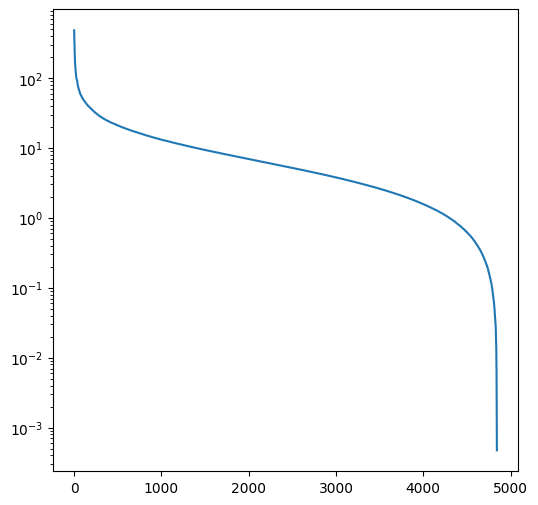

In [84]:
fig = plt.figure(figsize=(6,6))
plt.semilogy(sigmaBrown_flat)
plt.show()

In [85]:
nDimension = 200


In [86]:
sigmaBrown_reduced = np.zeros(sigmaBrown_flat.shape)
sigmaBrown_reduced[:nDimension] = sigmaBrown_flat[:nDimension]

In [87]:
brown_count_reduced = uBrown * sigmaBrown_reduced @ vtBrown

In [88]:
np.linalg.matrix_rank(brown_count_reduced)

200

In [89]:
def compareNN(word):
    return pd.concat([
        get_nearest_neighbors(word, n_neighbors=20, mtx=brown_count_reduced),
        get_nearest_neighbors(word, n_neighbors=30)
    ], axis=1)


In [90]:
compareNN("germany")

,word,cosine similarity,word,cosine similarity
0,germany,1.0,germany,1.0
1,berlin,0.8909517768868706,berlin,0.6057070728222133
2,greenwich,0.8517853937230839,greenwich,0.5299329050018617
3,coast,0.8133667675409452,coast,0.45646022981185497
4,germans,0.7033663501038988,germans,0.3973597071195132
5,river,0.6499092681000281,german,0.3205804274726973
6,middle,0.6321608846106137,river,0.29152647996287484
7,west,0.5550089073708095,middle,0.2819363471090537
8,china,0.5509089068754098,west,0.26885390408291654
9,virginia,0.5380027201136798,orange,0.25415212262620734
